In [1]:
import pandas as pd
from data import preprocess, simulator_loop, plot_ctr
from vowpalwabbit.dftovw import DFtoVW
from vowpalwabbit import Workspace
import numpy as np
import matplotlib.pyplot as plt
from contextualbandits.evaluation import evaluateFullyLabeled

In [2]:
df = pd.read_csv("train.csv")

In [8]:
X, y, label_mapping = preprocess(df)
X.head()

0        0
1        1
2        2
3        3
4        0
        ..
20753    4
20754    2
20755    4
20756    0
20757    4
Name: NObeyesdad, Length: 20758, dtype: int64


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,24.443011,1.699998,81.669950,0,0,2.000000,2.983297,0,0,2.763573,0,0.000000,0.976473,0,0
1,1,18.000000,1.560000,57.000000,0,0,2.000000,3.000000,1,0,2.000000,0,1.000000,1.000000,1,1
2,1,18.000000,1.711460,50.165754,0,0,1.880534,1.411685,0,0,1.910378,0,0.866045,1.673584,1,0
3,1,20.952737,1.710730,131.274851,0,0,3.000000,3.000000,0,0,1.674061,0,1.467863,0.780199,0,0
4,0,31.641081,1.914186,93.798055,0,0,2.679664,1.971472,0,0,1.979848,0,1.967973,0.931721,0,0


In [7]:
y[:5]

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0]])

In [4]:
columns = df.columns
y_col = "NObeyesdad"
x_cols = columns.to_list()
x_cols.remove(y_col)

(171980, 1.0)
(11650396, 1.0)
Obesity_Type_II:0:0.1428571492433548 | NObeyesdad:Overweight_Level_II 
(107463, 1.0)
(11650396, 1.0)
Obesity_Type_III:0:0.1428571492433548 | NObeyesdad:Normal_Weight 
(33433, 1.0)
(11650396, 1.0)
Insufficient_Weight:-1:0.1428571492433548 | NObeyesdad:Insufficient_Weight 
(143977, 1.0)
(11650396, 1.0)
Normal_Weight:0:0.1428571492433548 | NObeyesdad:Obesity_Type_III 
(171980, 1.0)
(11650396, 1.0)
Obesity_Type_I:0:0.1428571492433548 | NObeyesdad:Overweight_Level_II 
(33433, 1.0)
(11650396, 1.0)
Normal_Weight:0:0.1428571492433548 | NObeyesdad:Insufficient_Weight 
(201279, 1.0)
(11650396, 1.0)
Normal_Weight:0:0.1428571492433548 | NObeyesdad:Obesity_Type_II 
(201279, 1.0)
(11650396, 1.0)
Obesity_Type_I:0:0.1428571492433548 | NObeyesdad:Obesity_Type_II 
(11704, 1.0)
(11650396, 1.0)
Obesity_Type_I:0:0.1428571492433548 | NObeyesdad:Overweight_Level_I 
(143977, 1.0)
(11650396, 1.0)
Obesity_Type_I:0:0.1428571492433548 | NObeyesdad:Obesity_Type_III 
(11704, 1.0)
(1165

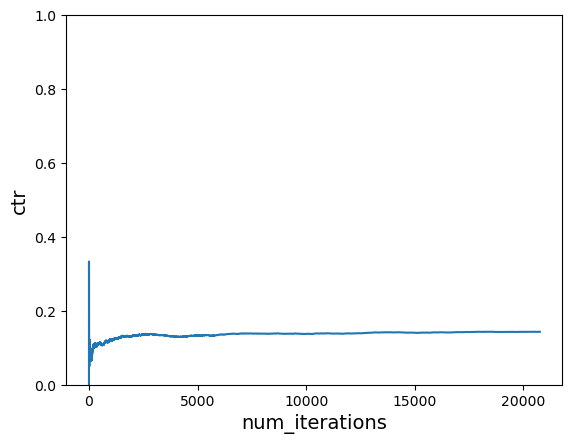

In [5]:
vw = Workspace(f"--cb_explore {7} --epsilon 0.5", enable_logging=True)
ctr = simulator_loop(vw, df, df[y_col].unique(), y_col, True)
plot_ctr(ctr)
plt.show()

In [6]:
vw.finish()
vw.get_log()

['using no cache',
 'Reading datafile = none',
 'num sources = 0',
 'Num weight bits = 18',
 'learning rate = 0.5',
 'initial_t = 0',
 'power_t = 0.5',
 'cb_type = mtr',
 'Enabled learners: gd, scorer-identity, csoaa_ldf-rank, cb_adf, cb_explore_adf_greedy, shared_feature_merger, cb_to_cbadf',
 'Input label = CB',
 'Output pred = ACTION_PROBS',
 'average  since         example        example        current        current  current',
 'loss     last          counter         weight          label        predict features',
 'n.a.     n.a.                1            1.0        unknown         0:0.14       14',
 'n.a.     n.a.                2            2.0        unknown         0:0.14       14',
 'n.a.     n.a.                4            4.0        unknown         0:0.14       14',
 'n.a.     n.a.                8            8.0        unknown         0:0.14       14',
 'n.a.     n.a.               16           16.0        unknown         0:0.14       14',
 'n.a.     n.a.               